<a href="https://colab.research.google.com/github/JonSpivak666/Transformaci-n-Inversa/blob/main/Transformacion_Inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de la Transformación Inversa

Este método consiste en, a través de una variable aleatoria uniforme $ U(0,1) $, hacer una simulación de una variable aleatoria $ X $ con función de distribución $ F_X $.

## Método

Si $ F_X $ es la distribución de $ X $ y $ U $ es una variable aleatoria uniforme $ U(0,1) $, entonces $ Y = F_X^{-1}(U) $ tiene la misma distribución de $ X $.

## Demostración

Notemos que

$$
F_Y(y) = P(Y \leq y) = P(F_X^{-1}(U) \leq y) = P(U \leq F_X(y)) = F_X(y)
$$

## Ejemplo

Si $ F_X(x) = 1 - e^{-x} $ con $ x \geq 0 $, entonces

$$
F_X^{-1}(x) = -\log(1-x)
$$

y por lo tanto

$$
-\log(1-U)
$$

tiene distribución $ F_X $.



In [2]:
import numpy as np
import pandas as pd
from math import log
from scipy.stats import weibull_min
from plotnine import *

In [3]:
U = np.random.uniform(low=0, high=1, size=5000)
F_inv_puntual = lambda x: log(1/(1-x))
F_inv = np.vectorize(F_inv_puntual)


In [4]:
mi_data = (pd.DataFrame({"simulación": F_inv(U),
                         "verdadero": np.random.weibull(1.0, 5000)})
           .melt(var_name="Tipo", value_name="Valor"))


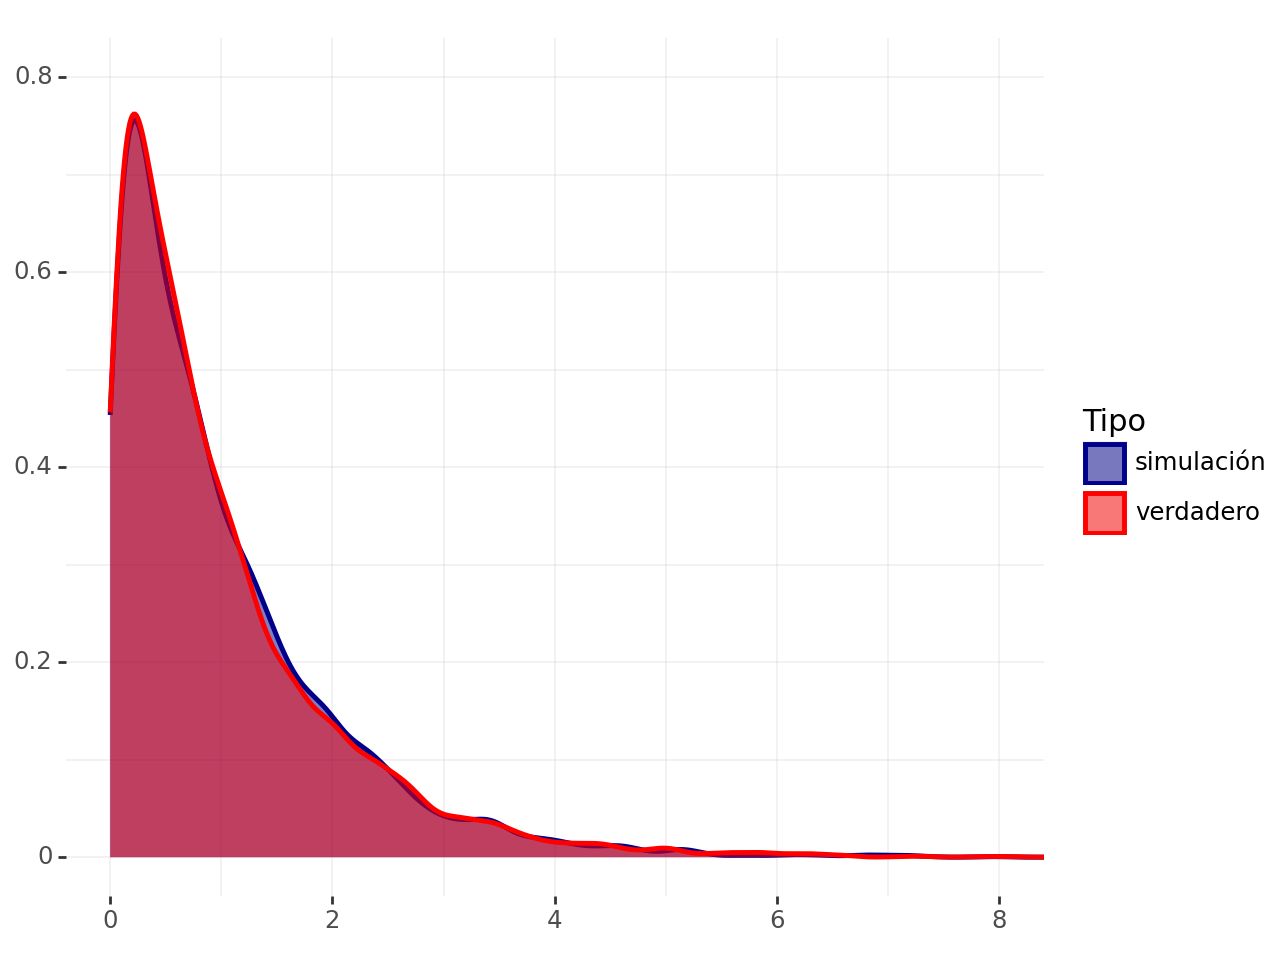

<Figure Size: (640 x 480)>

In [5]:
(ggplot(mi_data) +
 geom_density(aes(x="Valor", color="Tipo", fill="Tipo"), alpha=0.5, size=1) +
 scale_color_manual(values=["darkblue", "red"]) +
 scale_fill_manual(values=["darkblue", "red"]) +
 theme(panel_background=element_rect(fill="white"),
       panel_grid=element_line(color="darkgrey", size=0.1),
       axis_title=element_blank()) +
 coord_cartesian(xlim=[0, 8], ylim=[0, 0.8]))
